Number of grid points =  160000
data read
gamma0 =  400.0 , v0 =  0.9999968749951171
shock radius =  599.466


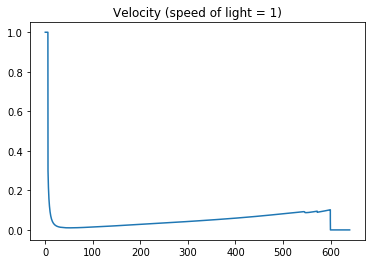

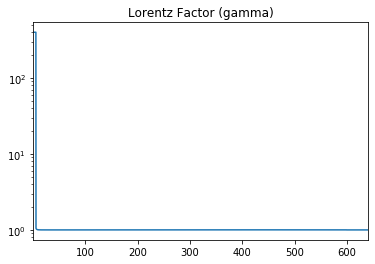

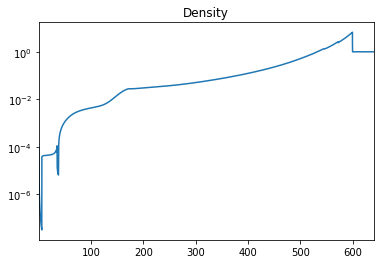

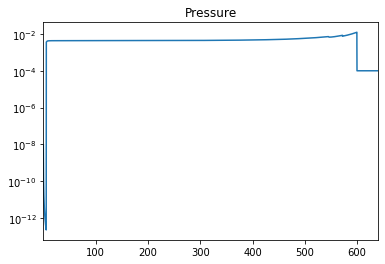

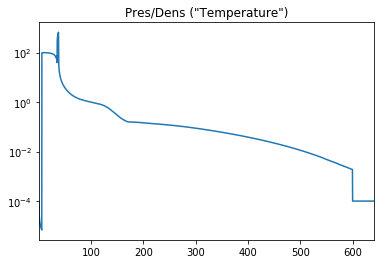

In [108]:
import numpy as np
from matplotlib import pyplot as plt
import os

# This box loads a data file, creates appropriate x locaion and Lorentz factor arrays, 
# and find the location of the shock front.
# It then make plots of some of the data.


#dir = "~/data/science/PLUTO/Results/RHD/Shock_Tubes/ST5/"

# Set the directory to load data from
#datadir = "../../PLUTO/Results/RHD/ST6/"
datadir = "./ST6/"


# Load data from the given file.
data = np.fromfile(datadir+"data.0999.dbl")

# Assumes we are loading 3 columns of data
datasize = np.int(data.size/3)

print('Number of grid points = ',datasize)

data = data.reshape((3,np.int(datasize)))

# Set the range of radius we use in the simulation, and make an array of values in x.
# This is the coordinate of the middle of each cell.
x = (np.arange(datasize)+.5)/(datasize)*640+.1

#print(x-.1,x.shape)
#print(data.shape)

print("data read")


# This is the inital Lotenz factor and velocity of material before it is shocked.
gamma0 = 400.

print("gamma0 = ",gamma0,", v0 = ",np.sqrt(1.-1./gamma0**2.))


# The 3 columns of data read are density, velocity, and pressure.
dens = data[0,:]
velx = data[1,:]
pres = data[2,:]

# Calculate Lorentz factor (gamma) based on the velocity.
gamma2 = 1./(1.-velx**2.)
gamma = np.sqrt(gamma2)


# Find the location of the shock.
# In the non-relavitistic limit, the density at the shock should be 7 times the density in front of it, for an adiabatic index of 4/3.
# So we can make the shock location the first point where the density i greater than 4?
# This will be the location of the shock, to the nearest gird point

bigr_index = np.max(np.argwhere(dens > 4.))  #1.01
bigr = x[bigr_index]
print('shock radius = ',bigr)


xmin=0.1 
xmax=640.1 

#xmin=185
#xmax=205

#xmin=375
#xmax=382

# Make some plots of the data.  pres/dens is proportional to temperature.

plt.plot(x,velx)
#plt.xscale('log')
plt.title('Velocity (speed of light = 1)')
plt.show()

plt.plot(x,gamma)
plt.yscale('log')
#plt.xscale('log')
plt.xlim([xmin,xmax])
plt.title('Lorentz Factor (gamma)')
plt.show()

plt.plot(x,dens)
plt.yscale('log')
plt.xlim([xmin,xmax])
#plt.xscale('log')
plt.title('Density')
plt.show()

plt.plot(x,pres)
plt.yscale('log')
plt.xlim([xmin,xmax])
#plt.xscale('log')
plt.title('Pressure')
plt.show()

plt.plot(x,pres/dens)
plt.yscale('log')
plt.xlim([xmin,xmax])
#plt.xscale('log')
plt.title('Pres/Dens ("Temperature")')
plt.show()


#plt.plot(data[2,:],data[0,:])
#plt.yscale('log')
#plt.xscale('log')
#plt.show()



72196
bigr =  288.88580491128073
mass_init_interp =  48254.86315913921  e_iso_interp =  1.7347723265405137e+28
m0b_k =  101035660.6882069 3.2476955883403953 1.7275683245022333 1.530496917552449
total_mass =  101026265.47733991
total_energy =  1.0886854012166082e+29 9.486753685932728e+28 9.079787928619982e+28


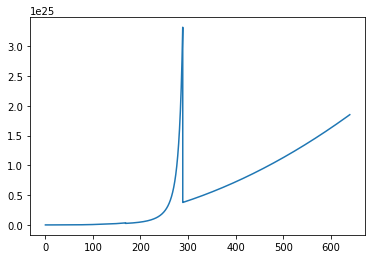

alpha_k =  0.884
gamma_s2 =  1.1240045541322041 0.11032388941514804 1.0601908102470066
gamma_s2_rel =  1.5412825980567326 0.3511897161099386 1.2414840305282757
gamma_s2_nr =  1.1276303656031537 0.11318457669848762 1.0618994140704447
gamma_s2_nr2 =  1.1163872637990915 0.10425348584058813 1.0565922883492438
gamma_s2_nr3 =  1.1131845766984876 0.10167637880339075 1.0550756260564869
gamma_s2_test2 =  nan nan nan
v_s2_test4 =  0.40130149839274143
gamma_s2_test4 =  1.6702897991483399 0.40130149839274143 1.2923969201249048
gamma_s2_test5 =  1.2360556704040915 0.19097495044613977 1.1117804056575613
gamma_s2_test6 =  1.2112367104174815 0.17439754640913557 1.1005619975346603
gamma_s2_test7 =  1.1732838826120058 0.14769135175217374 1.0831822942663003
gamma_s2_test8 =  1.1681487300377524 0.14394462427084803 1.0808092940189553
gamma_s2_test9 =  1.2020369739464407 0.16807883478253383 1.0963744679380494 0.40997418794667284
gamma_s2,gamma_s2_test,gamma_s2_rel,gamma_s2_nr =  1.1240045541322041 0.7055778

/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in sqrt
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in sqrt
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:318: RuntimeWarning: invalid value encountered in power
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:320: RuntimeWarning: invalid value encountered in power
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:321: RuntimeWarning: invalid value encountered in sqrt
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:326: RuntimeWarning: invalid value encountered in sqrt


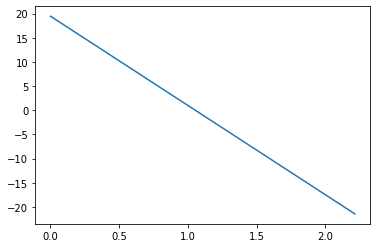

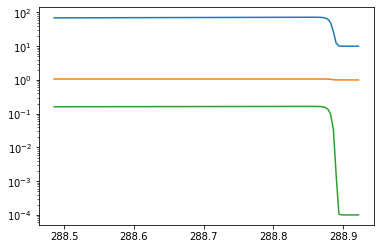

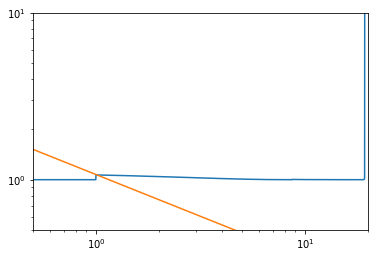

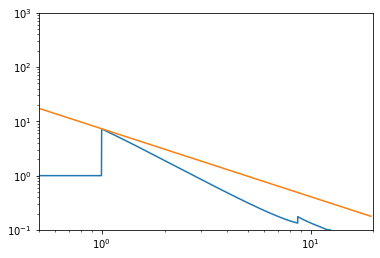

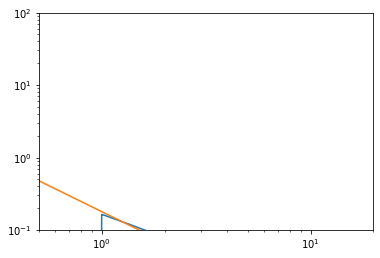

In [66]:
# Lets try comparing the the Blandford-McKee soluton

# Now doing this in the box above.
#bigr_index = np.max(np.argwhere(dens > 4.))  #1.01
#print(bigr_index)
#bigr = x[bigr_index]

m=3.
k=0.
rho_k = 1.

# Added 11/15/2020

# Calculate the initial mass:

r_init_min = 0.9   # initial inner radius
r_init_max = 1.0*249/250   # initial outer radius
dens_i = 1.e2 #1.e4
gamma_init = 400.

#mass_init_interp = gamma_init*4.*np.pi*dens_i*(r_init_max-r_init_min)
mass_init_interp = 4*np.pi*dens_i*(r_init_max-r_init_min)*gamma_init
#mass_init_interp = 4*np.pi*dens_i*(r_init_max-r_init_min)
                                                         
# Calculate initial energy:

# E = gamma*m*c^2
cl = 2.99792458e10  # speed of light in cm/s
#e_iso_interp = (gamma_init)*(cl**2.)*mass_init_interp
e_iso_interp = (gamma_init)*(cl**2.)*mass_init_interp
#e_iso_interp = (cl**2.)*mass_init_interp

print('bigr = ',bigr)
print('mass_init_interp = ',mass_init_interp,' e_iso_interp = ',e_iso_interp)


m0b_k = 4/(3-k)*np.pi*rho_k*bigr**(3-k) + mass_init_interp
g0b = (1+(1+(17-4*k)/4*4*e_iso_interp/m0b_k/cl**2)**(0.5))/2
c0b_k = 4 * e_iso_interp/m0b_k/cl**2 * (17-4*k)/4
v0b = ((-2+2*(1+c0b_k)**(0.5)+c0b_k)/(2+2*(1+c0b_k)**(0.5)+c0b_k))**0.5
gs0b = np.sqrt((g0b+1)*(4/3 * (g0b-1)+1)**2/(4/3 *(2-4/3)*(g0b-1)+2))
vs0b = np.sqrt(1-1/gs0b**2)

print('m0b_k = ',m0b_k,c0b_k,gs0b,g0b)


dx = x[1]-x[0]   # distance between two points.  Assumed constant.
dV = np.zeros(x.size)
dV[1:] = 4/3*np.pi*(x[1:]**3-x[0:-1]**3)

total_mass = np.sum(dens[0:bigr_index]*gamma[0:bigr_index]*dV[0:bigr_index])
#total_mass = np.sum(dens[0:bigr_index]*gamma[0:bigr_index]*4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)
#total_mass = np.sum(dens[0:]*gamma[0:]*4*np.pi*(x[1]-x[0])*x[0:]**2.)
#total_mass = np.sum(dens[0:bigr_index] * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

#rho_h = (dens+(4/3)/(4/3-1)*pres/cl**2.)
rho_h = (dens+(4/3)/(4/3-1)*pres)
total_energy_cum = np.cumsum( ((rho_h *gamma**2.*cl**2.) - pres*cl**2.) * dV)
total_energy = total_energy_cum[bigr_index]
#total_energy = np.sum( ((rho_h[0:bigr_index] *gamma[0:bigr_index]**1.*cl**2.) - pres[0:bigr_index]) * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

total_energy_test = np.sum(dens[0:bigr_index]*gamma[0:bigr_index]**2.*cl**2. * dV[0:bigr_index])
#total_energy_test = np.sum(dens[0:bigr_index]*gamma[0:bigr_index]**1.*cl**2. * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

print('total_mass = ',total_mass)
print('total_energy = ',total_energy,total_energy_test,total_mass*cl**2.)


#plt.plot(x,rho_h) #[0:bigr_index])
#plt.plot(x,rho_h*gamma**2.*cl**2.-pres*cl**2.) #[0:bigr_index])
plt.plot(x,(rho_h*gamma**2.*cl**2.-pres*cl**2.)*dV)
#plt.plot(x,total_energy_cum)
#plt.plot(pres[0:bigr_index])
#plt.yscale('log')
#plt.xlim([bigr*.99,bigr*1.01])
plt.show()


# DeColle formulation below.  Part above this not strictly necessary - Brian, 5/22/2017

m0b_k = 4/(3-k) * np.pi * rho_k * bigr**(3-k) + mass_init_interp
c0b_k = 4 * e_iso_interp/m0b_k/cl**2 * (17-4*k)/4
            
g_ad = 4/3
            
#alpha_k = 8*np.pi*(g_ad+1)/(3*(g_ad-1)*(3*g_ad-1)**2)
alpha_k = 0.884
#alpha_k = 1.1787
#alpha_k = 1.414
print('alpha_k = ',alpha_k)
            
f0 = e_iso_interp/(m0b_k * cl**2) * 4*np.pi/(3-k)
x0 = 8*np.pi / (17 - 4*k)
y0 = (5-k)**2/(4*alpha_k)
            
v_s2 = ((f0**2 + 4*f0*x0-2*f0*y0+y0**2)**0.5-f0-y0)/(2*x0-2*y0)
v_s = np.sqrt(v_s2)
            
gamma_s2 = 1/(1-v_s2)


print('gamma_s2 = ',gamma_s2,v_s2,np.sqrt(gamma_s2))

v_s2_test = ((f0**2 + 4*f0*x0-2*f0*y0+y0**2)**0.5-f0-y0)/(2*x0)
v_s_test = np.sqrt(v_s2_test)
gamma_s2_test = 1/(1-v_s2_test)

v_s2_rel = f0/(f0+x0)
v_s_rel = np.sqrt(v_s2_rel)
gamma_s2_rel = 1/(1-v_s2_rel)


print('gamma_s2_rel = ',gamma_s2_rel,v_s2_rel,np.sqrt(gamma_s2_rel))

#v_s2_nr = f0/(f0+y0)
#v_s2_nr = f0/(f0+y0)
v_s2_nr = f0/y0
#v_s2_nr = e_iso_interp/(rho_k*bigr**(3-k)*cl**2)*(4*alpha_k)/((5-k)**2)
#gamma_s2_nr = (1+v_s2_nr/2.)**2
#v_s2_nr = 1.-1/gamma_s2_nr
v_s_nr = np.sqrt(v_s2_nr)
gamma_s2_nr = 1/(1-v_s2_nr)
print('gamma_s2_nr = ',gamma_s2_nr,v_s2_nr,np.sqrt(gamma_s2_nr))

gamma_s2_nr2 = (1+v_s2_nr/2.)**2
v_s2_nr2 = 1.-1/gamma_s2_nr2
v_s_nr2 = np.sqrt(v_s2_nr2)
gamma_s2_nr2 = 1/(1-v_s2_nr2)
print('gamma_s2_nr2 = ',gamma_s2_nr2,v_s2_nr2,np.sqrt(gamma_s2_nr2))

gamma_s2_nr3 = 1+v_s2_nr
v_s2_nr3 = 1.-1/gamma_s2_nr3
v_s_nr3 = np.sqrt(v_s2_nr3)
gamma_s2_nr3 = 1/(1-v_s2_nr3)
print('gamma_s2_nr3 = ',gamma_s2_nr3,v_s2_nr3,np.sqrt(gamma_s2_nr3))


v_s2_test2 = 2*np.sqrt(f0-y0)/(np.sqrt(f0-y0)+np.sqrt(f0+4*x0-y0))
v_s_test2 = np.sqrt(v_s2_test2)
gamma_s2_test2 = 1/(1-v_s2_test2)
print('gamma_s2_test2 = ',gamma_s2_test2,v_s2_test2,np.sqrt(gamma_s2_test2))

# assumes y0 = 0, which is not true.
#v_s2_test3 = 2.*np.sqrt(f0) / (np.sqrt(f0)-np.sqrt(f0-4*x0))
#v_s_test3 = np.sqrt(v_s2_test3)
#gamma_s2_test3 = 1/(1-v_s2_test3)
#print('gamma_s2_test3 = ',gamma_s2_test3,v_s2_test3,np.sqrt(gamma_s2_test3),f0,x0,y0)

# Instead solve eqn. f0 = gamma^2*B^2*(x0*B^2 + y0*(1-B^2)/gamma^2) = B^2/(1-B^2) * (x0*B^2 + y0*(1-B^2)^2)
v_s2_test4 = (1./(3*2.**(1/3)*y0) * ((np.sqrt((9*f0*x0*y0+9*f0*y0**2-2*x0**3+12*x0**2*y0-15*x0*y0**2-2*y0**3)**2 + 
                                             4*(3*y0*(f0+y0)-(x0-2*y0)**2)**3) + 9*f0*x0*y0 + 9*f0*y0**2 - x0**3 + 
                                            12*x0**2*y0 - 15*x0*y0**2 - 2*y0**3)**(1/3)) - 
                                    2**(1/3)*(3*y0*(f0+y0)-(x0-2*y0)**2) / (3*y0*(np.sqrt((9*f0*x0*y0+9*f0*y0**2-2*x0**3+12*x0**2*y0-15*x0*y0**2-2*y0**3)**2 +
                                                  4*(3*y0*(f0+y0)-(x0-2*y0)**2)**3) + 9*f0*x0*y0 + 9*f0*y0**2 - x0**3 +
                                                  12*x0**2*y0 - 15*x0*y0**2 - 2*y0**3)**(1/3)) - (x0-2*y0)/(3*y0)  )
print('v_s2_test4 = ',v_s2_test4)
v_s_test4 = np.sqrt(v_s2_test4)
gamma_s2_test4 = 1/(1-v_s2_test4)
print('gamma_s2_test4 = ',gamma_s2_test4,v_s2_test4,np.sqrt(gamma_s2_test4))


v_s2_test5 = v_s2_rel*v_s2_rel+v_s2_nr2*(1-v_s2_rel)
v_s_test5 = np.sqrt(v_s2_test5)
gamma_s2_test5 = 1/(1-v_s2_test5)
print('gamma_s2_test5 = ',gamma_s2_test5,v_s2_test5,np.sqrt(gamma_s2_test5))

v_s2_test6 = (v_s_rel*v_s2_rel+v_s_nr2*(1-v_s2_rel))**2
v_s_test6 = np.sqrt(v_s2_test6)
gamma_s2_test6 = 1/(1-v_s2_test6)
print('gamma_s2_test6 = ',gamma_s2_test6,v_s2_test6,np.sqrt(gamma_s2_test6))

v_s2_avg = (v_s2_rel+v_s2_nr2)/2
v_s2_test7 = (v_s_rel*v_s2_avg+v_s_nr2*(1-v_s2_avg))**2
v_s_test7 = np.sqrt(v_s2_test7)
gamma_s2_test7 = 1/(1-v_s2_test7)
print('gamma_s2_test7 = ',gamma_s2_test7,v_s2_test7,np.sqrt(gamma_s2_test7))

v_s_avg = (v_s_rel+v_s_nr2)/2
v_s2_test8 = (v_s_rel*v_s_avg**2+v_s_nr2*(1-v_s_avg**2))**2
v_s_test8 = np.sqrt(v_s2_test8)
gamma_s2_test8 = 1/(1-v_s2_test8)
print('gamma_s2_test8 = ',gamma_s2_test8,v_s2_test8,np.sqrt(gamma_s2_test8))

index_test = 1.
v_s2_test9 = (v_s_rel*v_s_nr2**index_test+v_s_nr2*(1-v_s_nr2**index_test))**2
v_s_test9 = np.sqrt(v_s2_test9)
gamma_s2_test9 = 1/(1-v_s2_test9)
print('gamma_s2_test9 = ',gamma_s2_test9,v_s2_test9,np.sqrt(gamma_s2_test9),np.sqrt(v_s2_test9))


print('gamma_s2,gamma_s2_test,gamma_s2_rel,gamma_s2_nr = ',gamma_s2,gamma_s2_test,gamma_s2_rel,gamma_s2_nr)
print('v_s2,v_s2_test,v_s2_rel,v_s2_nr = ',v_s2,v_s2_test,v_s2_rel,v_s2_nr)
print('v_s,v_s_test,v_s_rel,v_s_nr = ',v_s,v_s_test,v_s_rel,v_s_nr)
print('gamma^2*beta^2 = ',gamma_s2*v_s2,gamma_s2_test*v_s2_test,gamma_s2_rel*v_s2_rel,gamma_s2_nr*v_s2_nr)

v_s2 = v_s2_test6
v_s = v_s_test6
gamma_s2 = gamma_s2_test6
#v_s2 = v_s2_nr
#v_s = v_s_nr
#gamma_s2 = gamma_s2_nr

vs0b = v_s
g_s0b = np.sqrt(gamma_s2)

gamma_test_values = np.arange(1000)+1

a = gamma_s2+0j
#a = gamma_test_values**2.+0j #gamma_test_values**2.
g = g_ad
g0b = gamma_s2

# Need to solve for gamma_f given gamma_s2 above.
# gamma_s_new2 = (gamma_f+1) * (g_ad*(gamma_f - 1) + 1)**2/(g_ad*(2-g_ad)*(gamma_f-1)+2)

#g0b = (18*a*g**6 - 18*a*g**5 + 18*a*g**4 + np.sqrt(4*(3*a*g**4 - 6*a*g**3 - 4*g**4 + 4*g**3 - g**2)**3 + (18*a*g**6 - 18*a*g**5 + 18*a*g**4 - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**2) - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**(1/3)/(3*2**(1/3)*g**2) - (2**(1/3) * (3*a*g**4 - 6*a*g**3 - 4*g**4 + 4*g**3 - g**2))/(3*g**2 * (18*a*g**6 - 18*a*g**5 + 18*a*g**4 + np.sqrt(4 * (3*a*g**4 - 6*a*g**3 - 4*g**4 + 4*g**3 - g**2)**3 + (18*a*g**6 - 18*a*g**5 + 18*a*g**4 - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**2) - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**(1/3)) - (2*g - g**2)/(3*g**2)
gamma_f_test = 0.0
gamma_f_test_i  = (18*a*g**6 - 18*a*g**5 + 18*a*g**4 + np.sqrt(4*(3*a*g**4 - 6*a*g**3 - 4*g**4 + 4*g**3 - g**2)**3 + (18*a*g**6 - 18*a*g**5 + 18*a*g**4 - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**2) - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**(1/3)/(3*2**(1/3)*g**2) - (2**(1/3) * (3*a*g**4 - 6*a*g**3 - 4*g**4 + 4*g**3 - g**2))/(3*g**2 * (18*a*g**6 - 18*a*g**5 + 18*a*g**4 + np.sqrt(4 * (3*a*g**4 - 6*a*g**3 - 4*g**4 + 4*g**3 - g**2)**3 + (18*a*g**6 - 18*a*g**5 + 18*a*g**4 - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**2) - 16*g**6 + 24*g**5 - 12*g**4 + 2*g**3)**(1/3)) - (2*g - g**2)/(3*g**2)
gamma_f_test = gamma_f_test_i.real
#gamma_f_test = -(-384*a - 400)/(192*(12*np.sqrt(3)*np.sqrt(-32*a**3 + 407*a**2 - 375*a) + 468*a - 125)**(1/3.)) + 1/12*(12*np.sqrt(3)*np.sqrt(-32*a**3 + 407*a**2 - 375*a) + 468*a - 125)**(1/3.) - 1/6

#gamma_s_new2 = (gamma_test_values+1) * (g_ad*(gamma_test_values - 1) + 1)**2/(g_ad*(2-g_ad)*(gamma_test_values-1)+2)
gamma_s_new2 = (gamma_f_test+1) * (g_ad*(gamma_f_test - 1) + 1)**2/(g_ad*(2-g_ad)*(gamma_f_test-1)+2)

#plt.plot(gamma_test_values,np.sqrt(gamma_s_new2))
#plt.plot(gamma_f_test,gamma_test_values,)
#plt.yscale('log')
#plt.xscale('log')
#plt.show()

g0b = gamma_f_test
v0b2 = 1 - 1/g0b**2

print('gamma_f_test = ',gamma_f_test,gamma_s_new2,(gamma_f_test-1)*v0b2**1.+1)
print('v0b = ',np.sqrt(v0b2))

#######
#######
#######
# This seems to fix things and I don't know why
#g0b = (gamma_f_test-1)*v0b2**1.+1
#gamma_f_test = g0b
#gamma_s_new2 = (gamma_f_test+1) * (g_ad*(gamma_f_test - 1) + 1)**2/(g_ad*(2-g_ad)*(gamma_f_test-1)+2)
#print('gamma_f_test_new,gammas_s_new2 = ',gamma_f_test,gamma_s_new2)

v0b2 = 1 - 1/g0b**2
v0b = np.sqrt(v0b2)



#E_rel = x0*rho_k*bigr**(3-k)*gamma_s2*vs0b**2*cl**2
E_rel = x0*rho_k*bigr**(3-k)*gamma_s2_rel*v_s_rel**2*cl**2

#E_nr = y0*rho_k*bigr**(3-k)*vs0b**2*cl**2
#E_nr = y0*rho_k*bigr**(3-k)*2.*(np.sqrt(gamma_s2)*(np.sqrt(gamma_s2)))*cl**2
#E_nr = y0*rho_k*bigr**(3-k)*2.*((np.sqrt(gamma_s2)))*cl**2
#E_nr = y0*alpha_k**2*bigr**(3-k) * vs0b**2*cl**2
#E_nr = y0*rho_k*bigr**(3-k) * gamma_s2*vs0b**2*cl**2
E_nr = y0*rho_k*bigr**(3-k) * v_s_nr**2*cl**2
#E_nr = y0*alpha_k**2*bigr**(3-k) * cl**2*2*(np.sqrt(gamma_s2)-1)

t_rel = bigr
t_nr = ((e_iso_interp/alpha_k/rho_k/cl**2)**(-1/(5-k)) * bigr)**((5-k)/2)
v_nr = 2/(5-k)*(e_iso_interp/alpha_k/rho_k/cl**2)**.5*(bigr)**(-(3-k)/2)
ttt = 320/cl
R_t_nr = (e_iso_interp/alpha_k/rho_k)**(1/(5-k))*ttt**(2/(5-k))
v_t_nr = 2/(5-k)*(e_iso_interp/alpha_k/rho_k)**.5*R_t_nr**(-(3-k)/2)/cl
print('t_rel, t_nr, v_nr = ',t_rel,t_nr,v_nr,R_t_nr,v_t_nr)

gamma2_beta2_t_rel = (17-4*k)/(8*np.pi)*(e_iso_interp/rho_k/cl**2)*t_rel**(-(3-k))
v2_t_rel = gamma2_beta2_t_rel/(gamma2_beta2_t_rel+1)
v_t_rel = np.sqrt(v2_t_rel)
gamma2_t_rel = 1/(1-v2_t_rel)
gamma_t_rel = np.sqrt(gamma2_t_rel)
print('v_t_rel,gamma_t_rel',v_t_rel,gamma_t_rel)

print('E_rel, E_nr = ',E_rel,E_nr,E_rel*vs0b**2.+E_nr*(1-vs0b**2),m0b_k*cl**2.)
print('E_rel, E_nr = ',E_rel,E_nr*gamma_s2,E_rel*vs0b**2.+E_nr*gamma_s2*(1-vs0b**2))
print('E_rel, E_nr = ',E_rel,E_nr*np.sqrt(gamma_s2),E_rel*vs0b**2.+E_nr*np.sqrt(gamma_s2)*(1-vs0b**2))

print('gamma_s,gamma_f_test,gamma_s_new = ',np.sqrt(a),gamma_f_test,np.sqrt(gamma_s_new2))

print('m0b_k = ',m0b_k,c0b_k,np.sqrt(gamma_s2),g0b)

# End added 11/15/2020
            
print('g0b, gamma in sim = ',g0b,gamma[bigr_index-30])
print('v0b2, v^2 in sim = ',v0b2,velx[bigr_index-30]**2)
#g0b = gamma[bigr_index]


g0b2 = g0b**2
v0b2 = 1 - 1/g0b2
v0b = np.sqrt(v0b2)

print('bigr_index, bigrr, g0b = ',bigr_index,bigr,g0b)

rxi0 = x/bigr

#xi = 1 + 4*(m+1) * (1-x/bigr) *g0b**2
xi = 1 + 4*(m+1) * (1-rxi0) *g0b**2

gamma_f_should_be = (gamma[bigr_index-10]**2.)**0.5  #*xi[bigr_index-10])**0.5
v0b2_should_be = 1-1/gamma_f_should_be**2
v0b_should_be = np.sqrt(v0b2_should_be)

gamma_s2_should_be = (gamma_f_should_be+1) * (g_ad*(gamma_f_should_be - 1) + 1)**2/(g_ad*(2-g_ad)*(gamma_f_should_be-1)+2)
gamma_s_should_be = np.sqrt(gamma_s2_should_be)
v_s2_should_be = 1-1/gamma_s2_should_be
v_s_should_be = np.sqrt(v_s2_should_be)
print('gamma_f in sim should be',gamma_f_should_be,v0b_should_be)
print('gamms_s2 in sim hsould be,v_s2,v_s',gamma_s2_should_be,v_s2_should_be,v_s_should_be)

print(xi[bigr_index])

densprime_test2 = bigr**(-k) * rho_k * 3 * (4/3 * g0b+1) * g0b*xi**(-(7-2*k)/(4-k))
#densprime_test2 = bigr**(-k) * rho_k * 3 * (4/3 * g0b+1) *xi**(-(10-3*k)/(8-2*k))
pres_test2 = bigr**(-k)*rho_k* (g0b-1)*(4/3 *g0b + 1) * xi**(-(17-4*k)/(12-3*k))
gamma_test2 = np.sqrt(g0b*g0b/xi)
#gamma_test2 = np.sqrt(g0b*g0b/xi**.5)

dens_test2=densprime_test2/gamma_test2

beta_test2 = np.sqrt(1-gamma_test2**(-2))

print('gamma  = ',gamma_test2[bigr_index])
print('vel  = ',np.sqrt(1.-1/gamma_test2[bigr_index]**2.))
print('dens = ',dens_test2[bigr_index])
print('pres = ',pres_test2[bigr_index],2/(4/3+1)*rho_k*v_s2,2/(4/3+1)*rho_k*v_s2*gamma_s2)


# Verify mass and energy of analytic solution:
total_mass_test2 = np.sum(dens_test2[0:bigr_index]*gamma_test2[0:bigr_index] * dV[0:bigr_index])
#total_mass = np.sum(dens[0:]*gamma[0:]*4*np.pi*(x[1]-x[0])*x[0:]**2.)
#total_mass = np.sum(dens[0:bigr_index] * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

#rho_h = (dens+(4/3)/(4/3-1)*pres/cl**2.)
rho_h_test2 = (dens_test2+(4/3)/(4/3-1)*pres_test2)
total_energy_test2 = np.sum( ((rho_h_test2[0:bigr_index] *gamma_test2[0:bigr_index]**2.*cl**2.) - pres_test2[0:bigr_index]*cl**2.) * dV[0:bigr_index])
#total_energy = np.sum( ((rho_h[0:bigr_index] *gamma[0:bigr_index]**1.*cl**2.) - pres[0:bigr_index]) * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

total_energy_test_test2 = np.sum(dens_test2[0:bigr_index]*gamma_test2[0:bigr_index]**2.*cl**2. * dV[0:bigr_index])
#total_energy_test = np.sum(dens[0:bigr_index]*gamma[0:bigr_index]**1.*cl**2. * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

print('test2 total mass and energy = ',total_mass_test2,total_energy_test2,total_energy_test2-total_mass_test2*cl**2)


plt.plot(rxi0,xi)
plt.show()

plt.plot(x[bigr_index-100:bigr_index+10],dens[bigr_index-100:bigr_index+10]*10.)
plt.plot(x[bigr_index-100:bigr_index+10],gamma[bigr_index-100:bigr_index+10])
plt.plot(x[bigr_index-100:bigr_index+10],pres[bigr_index-100:bigr_index+10])
#plt.ylim([1.e-2,500.])
plt.yscale('log')
plt.show()

#plt.plot(x[bigr_index-100:bigr_index],gamma[bigr_index-100:bigr_index])
#plt.show()

plt.plot(xi,gamma)
plt.plot(xi,gamma_test2)
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.5,20.])
plt.ylim([.5,10.])
#plt.xlim([xmin,xmax])
plt.show()

plt.plot(xi,dens)
plt.plot(xi,dens_test2)
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.5,20.])
plt.ylim([.1,1000.])
#plt.xlim([xmin,xmax])
plt.show()

#plt.plot(xi,pres/dens)
#plt.plot(xi,pres_test2/dens_test2)
plt.plot(xi,pres)
plt.plot(xi,pres_test2)
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.5,20.])
plt.ylim([.1,100.])
#plt.xlim([xmin,xmax])
plt.show()



12.566370614359172 6.5158958741121635
vs0b, v0b_taylor, v0b =  0.4176093227038108 0.35795084803183785 0.3642982842665895
pres =  0.17943215591413886 0.1494836112078305
total_energy_nr =  2.1283618523864497e+28
test2 total mass and energy =  117378278.24726279 8.6158110813058e+28 -1.9336224632880589e+28
test3 total mass and energy =  97995422.08472931 1.709051429154993e+29 9.333935695173989e+28 8.283124982434852e+28
I_k, I_t 0.03923308856758498 0.1317624592924486
beta_A =  2.6382170241262326
alpha_k =  0.8840750103008531


/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in power
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in power
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in sqrt


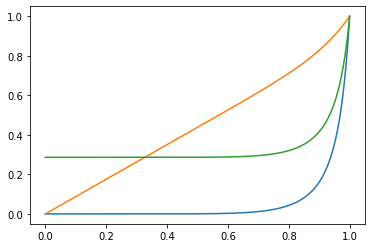

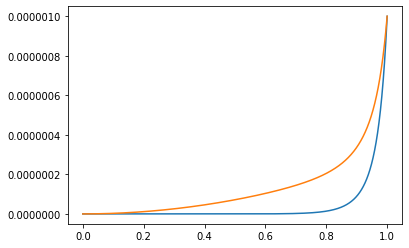

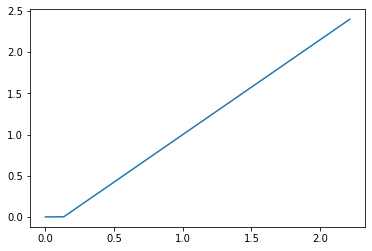

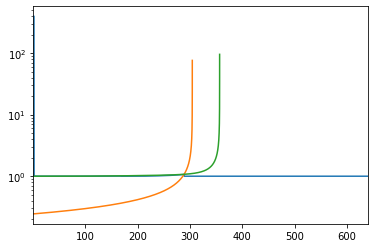

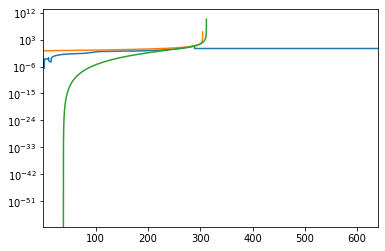

/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: RuntimeWarning: invalid value encountered in true_divide


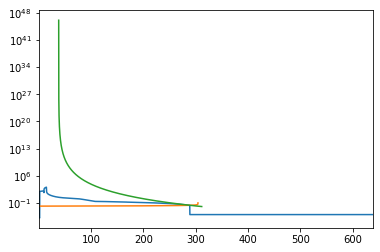

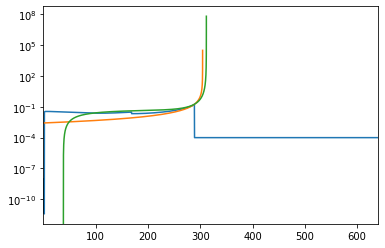

In [67]:
# Taylor approximation to Sedov-Taylor structure
# Using some approximation to sedov solution dehind shock, rather than blandford-mckee ?? - Brian, 3/18/2016
gammat=4./3.
ntay=(7.*gammat-1.)/(gammat**2.-1.)                                                                                      
pt=2.*(gammat+5.)/(7.-gammat)                                                                                         
qt=(2.*gammat**2.+7.*gammat-3.)/(7.-gammat) 
st=(gammat+1.)/(7.-gammat)                                                                                            

          # Using extended Taylor approximations, for any external density.  From Petruk 2000 A&A 357, 686.  His m is our k - Brian, 8/01/2016

nn=2  # spherical coordinates
ntaye = ((2-nn)*gammat**2. + (3.*nn+1)*gammat - 1 - k*gammat*(gammat+1)) / (gammat**2.-1.)
pte = (2.*(gammat + 2.*nn + 1 - k*(gammat+1.))) / (3.*nn + 1. - (nn-1.)*gammat - k*(gammat+1.))
qte = (2.*gammat**2. + (3.*nn+1.)*gammat) - (nn+1.) - (k*gammat*(gammat+1.)) / (3.*nn + 1. - (nn-1.)*gammat - k*(gammat+1.))
ste = (gammat+1.) / (3.*nn + 1. - (nn-1.)*gammat - k*(gammat+1.))

ntay=ntaye
pt=pte #-1.
qt=pte 
st=ste


# Maybe I'm not setting the initial velocity right? - Brian, 11/19/2020
sigma_taylor = 2*np.pi*nn + (nn-1)*(nn-2)
alpha_a_taylor = 2*sigma_taylor*(gammat+1) / ((nn+1)*(gammat-1)*((nn+1)*gammat-nn+1)**2)
v0b_taylor = vs0b*(1/gammat+alpha_a_taylor)
v0b_taylor = 2/(gammat+1)*vs0b

print(sigma_taylor,alpha_a_taylor)
print('vs0b, v0b_taylor, v0b = ',vs0b,v0b_taylor, v0b)



            # With new coefficients, works for any external density. - Brian, 8/01/2016
  
rxi = g0b**2.*(1./g0b**2.+rxi0-1.)  # similarity variable to take gamma into account.  Not valid beyond 1./g0b**2. from front edge
#            rxi = rxi0
rxi[np.where(rxi <= 0.)]=0.

#rxi=rxi0
#rxi=(rxi-1.)/2.+1.
#g0b_old=g0b

densprime_test3 = bigr**(-k)*rho_k * 3.*(4./3.*g0b+1.)*g0b * rxi**((3.-k*gammat)/(gammat-1.))*((gammat+1.)/gammat - rxi**(ntay-1.)/gammat)**(-pt) * (rxi/rxi0)**2.  # for area change? --- - Brian, 5/4/2016
pres_test3=bigr**(-k)*rho_k * (g0b-1.e0)*(4./3.*g0b+1.e0) * ((gammat+1.)/gammat - rxi**(ntay-1.)/gammat)**(-qt) * (rxi/rxi0)**2.  # for area change? --- - Brian, 5/4/2016
vel_taylor = v0b * (gammat+1.)/2. * (rxi/gammat + (gammat-1.)/(gammat+1.)*rxi**ntay/gammat)
gamma_test3=np.sqrt(1.e0/(1.e0-vel_taylor**2.e0))  # sqrt((g0b-1.d0)^2.d0/xi)+1.d0
#vel_taylor = v0b * (gammat+1.)/2. * (rxi0/gammat + (gammat-1.)/(gammat+1.)*rxi0**ntay/gammat)
#gamma_test3=np.sqrt(1.e0/(1.e0-vel_taylor**2.e0))  # sqrt((g0b-1.d0)^2.d0/xi)+1.d0
dens_test3=densprime_test3/gamma_test3

pres_test3[np.where(rxi <= 0.)]=0.
gamma_test3[np.where(rxi <= 0.)]=1.

            # need a new value for beta also - Brian, 12/18/2013
beta_test3=np.sqrt(1e0-gamma_test3**(-2e0))

#g0b=g0b_old

print('pres = ',pres_test3[bigr_index],2/(4/3+1)*rho_k*v_s2)



# Verify mass and energy of analytic solution:
total_mass_test3 = np.sum(dens_test3[0:bigr_index]*gamma_test3[0:bigr_index] * dV[0:bigr_index])
#total_mass = np.sum(dens[0:]*gamma[0:]*4*np.pi*(x[1]-x[0])*x[0:]**2.)
#total_mass = np.sum(dens[0:bigr_index] * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

#rho_h = (dens+(4/3)/(4/3-1)*pres/cl**2.)
rho_h_test3 = (dens_test3+(4/3)/(4/3-1)*pres_test3)
total_energy_test3 = np.sum( ((rho_h_test2[0:bigr_index] *gamma_test3[0:bigr_index]**2.*cl**2.) - pres_test3[0:bigr_index]*cl**2.) * dV[0:bigr_index])
#total_energy = np.sum( ((rho_h[0:bigr_index] *gamma[0:bigr_index]**1.*cl**2.) - pres[0:bigr_index]) * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

total_energy_test32 = np.sum(dens_test3[0:bigr_index]*gamma_test3[0:bigr_index]**2.*cl**2. * dV[0:bigr_index])
#total_energy_test32 = np.sum(dens_test3[0:bigr_index]*gamma_test3[0:bigr_index]*(gamma_test3[0:bigr_index]-1)*cl**2. * dV[0:bigr_index])
#total_energy_test = np.sum(dens[0:bigr_index]*gamma[0:bigr_index]**1.*cl**2. * 4*np.pi*(x[1]-x[0])*x[0:bigr_index]**2.)

total_energy_nr = np.sum((dens_test3[0:bigr_index]*vel_taylor[0:bigr_index]**2/2+pres_test3[0:bigr_index]/(gammat-1))*cl**2*dV[0:bigr_index])
print('total_energy_nr = ',total_energy_nr)

print('test2 total mass and energy = ',total_mass_test2,total_energy_test2,total_energy_test2-total_mass_test2*cl**2)
print('test3 total mass and energy = ',total_mass_test3,total_energy_test3,total_energy_test32,total_energy_test3-total_mass_test3*cl**2)



# Here we're going to do a semi-analytical apporximation of alpha_k:

rint = (np.arange(1000000)+.5)/1000000

rho_taylor = rint**((3.-k*gammat)/(gammat-1.))*((gammat+1.)/gammat - rint**(ntay-1.)/gammat)**(-pt)
u_taylor = (gammat+1.)/2. * (rint/gammat + (gammat-1.)/(gammat+1.)*rint**ntay/gammat)
pres_taylor = ((gammat+1.)/gammat - rint**(ntay-1.)/gammat)**(-qt)

I_k = np.sum(rho_taylor*u_taylor**2*rint**2*(rint[1]-rint[0])) #*(9/4*gammat**2-1)
I_t = np.sum(pres_taylor*rint**2*(rint[1]-rint[0])) #* gammat**2

beta_A = 4*(3-k)/(gammat**2-1.)*(I_k+I_t)

alpha_k_taylor = (2/(5-k))**2*(2*np.pi/(3-k)) * beta_A
alpha_k_taylor = 8*np.pi/((5-k)**2*(3-k)) * beta_A
alpha_k_taylor = 8*(4*np.pi)/(gammat**2-1)* 1/(5-k)**2*(I_k+I_t)
print('I_k, I_t',I_k,I_t)
print('beta_A = ',beta_A)
print('alpha_k = ',alpha_k_taylor)


plt.plot(rint,rho_taylor)
plt.plot(rint,u_taylor)
plt.plot(rint,pres_taylor)
plt.show()

plt.plot(rint,rho_taylor*u_taylor**2*rint**2*(rint[1]-rint[0]))
plt.plot(rint,pres_taylor*rint**2*(rint[1]-rint[0]))
plt.show()

plt.plot(rxi0,rxi)
#plt.plot(rxi0,xi)
plt.show()

plt.show()     

plt.plot(x,gamma)
plt.plot(x,gamma_test2)
plt.plot(x,gamma_test3)
plt.yscale('log')
plt.xlim([xmin,xmax])
plt.show()

plt.plot(x,dens)
plt.plot(x,densprime_test2/gamma_test2)
plt.plot(x,densprime_test3/gamma_test3)
plt.yscale('log')
plt.xlim([xmin,xmax])
plt.show()

plt.plot(x,pres/dens)
plt.plot(x,pres_test2/dens_test2)
plt.plot(x,pres_test3/dens_test3)
plt.yscale('log')
plt.xlim([xmin,xmax])
plt.show()

plt.plot(x,pres)
plt.plot(x,pres_test2)
plt.plot(x,pres_test3)
plt.yscale('log')
plt.xlim([xmin,xmax])
plt.show()



gamma =  1.017989088905872
beta =  0.3642982842665895
pt =  2.2352941176470584
2.695604022686631
7.2951529443448875
7.295152944344871


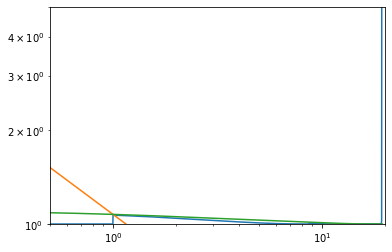

test2_corr gamma-1, dens, pres =  1.0309102696645005 1.011573741059206 1.086138481502634
test3_corr gamma-1, dens, pres =  1.088847471399121 1.009043292785804 1.0893118086374318
test2_corr vel^2 =  1.0279241086839634
test3_corr vel^2 =  1.079825568644261


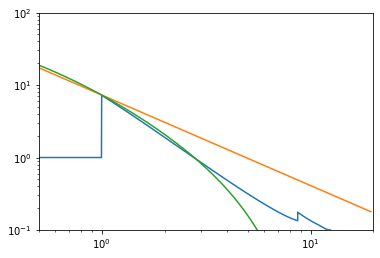

/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide


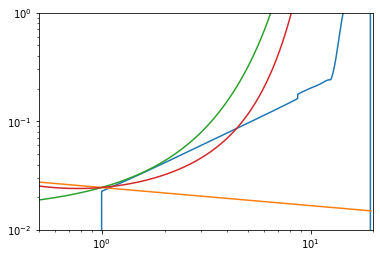

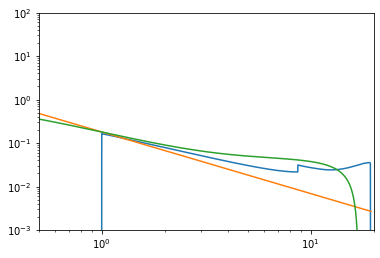

In [68]:

print('gamma = ',gamma[bigr_index])
print('beta = ',beta_test2[bigr_index])
print('pt = ',pt)

print(dens[bigr_index])
print(dens_test2[bigr_index])
print(dens_test3[bigr_index])

plt.plot(xi,gamma)
plt.plot(xi,gamma_test2)
plt.plot(xi,gamma_test3)
plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.e0,5e0])
plt.xlim([0.5,20.])
plt.show()

corr_index = bigr_index
corr_index = bigr_index-30

#dens_test2_corr = dens_test2/dens_test2[corr_index]*dens[corr_index]
#dens_test3_corr = dens_test3/dens_test3[corr_index]*dens[corr_index]
#
#pres_test2_corr = pres_test2/pres_test2[corr_index]*pres[corr_index]
#pres_test3_corr = pres_test3/pres_test3[corr_index]*pres[corr_index]
#
#gamma_test2_corr = gamma_test2/gamma_test2[corr_index]*gamma[corr_index]
#gamma_test3_corr = gamma_test3/gamma_test3[corr_index]*gamma[corr_index]

print('test2_corr gamma-1, dens, pres = ',(gamma_test2[corr_index]-1)/(gamma[corr_index]-1),dens_test2[corr_index]/dens[corr_index],pres_test2[corr_index]/pres[corr_index])
print('test3_corr gamma-1, dens, pres = ',(gamma_test3[corr_index]-1)/(gamma[corr_index]-1),dens_test3[corr_index]/dens[corr_index],pres_test3[corr_index]/pres[corr_index])

print('test2_corr vel^2 = ',(1-1/gamma_test2[corr_index]**2)/(1-1/gamma[corr_index]**2))
print('test3_corr vel^2 = ',(1-1/gamma_test3[corr_index]**2)/(1-1/gamma[corr_index]**2))

dens_test2_corr = dens_test2
dens_test3_corr = dens_test3

pres_test2_corr = pres_test2
pres_test3_corr = pres_test3

gamma_test2_corr = gamma_test2
gamma_test3_corr = gamma_test3



plt.plot(xi,dens)
plt.plot(xi,dens_test2_corr)
plt.plot(xi,dens_test3_corr)
plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.e-1,1.e2])
plt.xlim([0.5,20.])
plt.show()

plt.plot(xi,pres/dens)
plt.plot(xi,pres_test2_corr/dens_test2_corr)
plt.plot(xi,pres_test3_corr/dens_test3_corr)
plt.plot(xi,pres_test2_corr/dens_test3_corr)
plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.e-2,1.e0])
plt.xlim([0.5,20.])
plt.show()


plt.plot(xi,pres)
plt.plot(xi,pres_test2_corr)
plt.plot(xi,pres_test3_corr)
plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.e-3,1.e2])
plt.xlim([0.5,20.])
plt.show()


68281 2.0000588003242212
3915
-1.8056800613584794 -0.9916132153637492
-1.2500000000000002 -1.4166666666666667
2.0000588003242212


/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in power
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in power
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


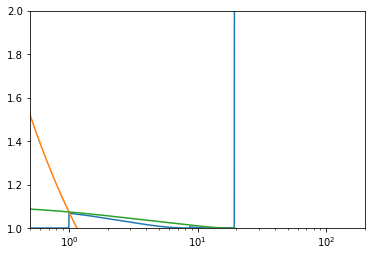

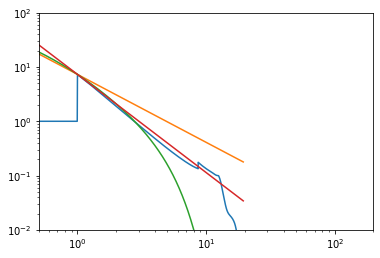

/Users/brianmorsony/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in true_divide


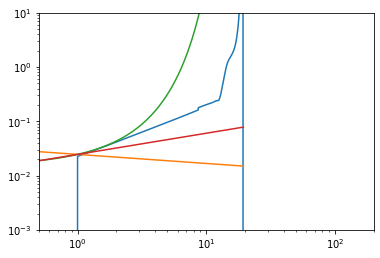

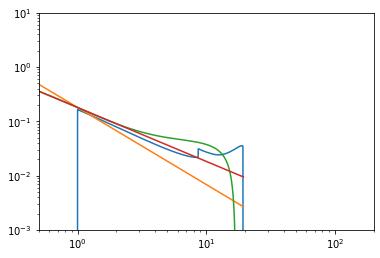

In [69]:
## print(np.log(1.1**3/1.**3)/np.log(1.1/1.))

xi_ge = np.where(xi >= 2.)[0]
xi_eq = xi_ge[-1]
print(xi_eq,xi[xi_eq])
index2 = bigr_index-xi_eq
print(index2)

#index2 = 200

dens3_plaw = (np.log(dens_test3[bigr_index]/dens_test3[bigr_index-index2])/np.log(xi[bigr_index]/xi[bigr_index-index2]))

pres3_plaw = (np.log(pres_test3[bigr_index]/pres_test3[bigr_index-index2])/np.log(xi[bigr_index]/xi[bigr_index-index2]))

dens2_plaw = (np.log(dens_test2[bigr_index]/dens_test2[bigr_index-index2])/np.log(xi[bigr_index]/xi[bigr_index-index2]))

pres2_plaw = (np.log(pres_test2[bigr_index]/pres_test2[bigr_index-index2])/np.log(xi[bigr_index]/xi[bigr_index-index2]))

print(dens3_plaw,pres3_plaw)
print(dens2_plaw,pres2_plaw)
print(xi[bigr_index-index2])


#dens3_plaw = -2.
#pres3_plaw = -0.9

#dens_test5 = dens[corr_index]*xi**dens3_plaw
#pres_test5 = pres[corr_index]*xi**pres3_plaw

dens_test5 = dens_test3_corr[bigr_index]*xi**dens3_plaw
pres_test5 = pres_test3_corr[bigr_index]*xi**pres3_plaw



# From my Blandford-McKee code:
densprime_test4 = densprime_test2*v0b**2. + densprime_test3*(1.-v0b**2.)
pres_test4 = pres_test2*v0b**2. + pres_test3*(1.-v0b**2.)
beta_test4 = np.sqrt(beta_test2**2.*v0b**2. + beta_test3**2.*(1.-v0b**2.))
gamma_test4=np.sqrt(1.e0/(1.e0-beta_test4**2.e0))
dens_test4=densprime_test4/gamma_test4

# Revised:
densprime_test4 = np.exp(np.log(densprime_test2)*v0b**2. + np.log(densprime_test3)*(1.-v0b**2.))
pres_test4 = np.exp(np.log(pres_test2)*v0b**2. + np.log(pres_test3)*(1.-v0b**2.))
#beta_test4 = np.exp(np.log(np.sqrt(beta_test2**2.*v0b**2.) + np.log(beta_test3**2.*(1.-v0b**2.)))
gamma_test4=np.sqrt(1.e0/(1.e0-beta_test4**2.e0))
dens_test4=densprime_test4/gamma_test4




plt.plot(xi,gamma)
plt.plot(xi,gamma_test2_corr)
plt.plot(xi,gamma_test3_corr)
#plt.plot(xi,dens_test5)
#plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.,2.])
#plt.ylim([0.9,1.2])
plt.xlim([0.5,200.])
plt.show()


plt.plot(xi,dens)
plt.plot(xi,dens_test2_corr)
plt.plot(xi,dens_test3_corr)
plt.plot(xi,dens_test5)
#plt.plot(xi,dens_test2_corr*(gamma_test2_corr/gamma_test3_corr)**1.5)
plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.e-2,1.e2])
plt.xlim([0.5,200.])
plt.show()

plt.plot(xi,pres/dens)
plt.plot(xi,pres_test2_corr/dens_test2_corr)
plt.plot(xi,pres_test3_corr/dens_test3_corr)
###plt.plot(xi,pres_test3_corr/dens_test2_corr)
##plt.plot(xi,pres_test3_corr/dens_test5)
plt.plot(xi,pres_test2_corr/dens_test5)
#plt.plot(xi,pres_test5/dens_test2_corr)
#plt.plot(xi,pres_test2_corr/dens_test2_corr*(gamma_test2_corr/gamma_test3_corr)**-1.)
#plt.plot(xi,pres_test5/dens_test2_corr*(gamma_test2_corr/gamma_test3_corr)**-1.)
###plt.plot(xi,pres_test5/dens_test5)
#plt.plot(xi,pres_test3_corr/(dens_test2_corr*(gamma_test2_corr/gamma_test3_corr)**1.5))

plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.e-3,1.e1])
plt.xlim([0.5,200.])
plt.show()


plt.plot(xi,pres)
plt.plot(xi,pres_test2_corr)
plt.plot(xi,pres_test3_corr)
plt.plot(xi,pres_test5)
#plt.plot(xi,pres_test2_corr*(gamma_test2_corr/gamma_test3_corr)**-.5)
plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin,xmax])
plt.ylim([1.e-3,1.e1])
plt.xlim([0.5,200.])
plt.show()



In [6]:
a=0.00345678

print(a)
print('test '+'{:.2e}'.format(a))

0.00345678
test 3.46e-03


In [36]:
import os 
import numpy as np

datadir = './ST6/'


files = os.listdir(datadir)
dbl = '.dbl'
DataFiles= [file for file in files if dbl in file]
##print(DataFiles) ##all the dbl files seperated

AllDensity = []
AllVelx = []
AllPressure = []


for data in DataFiles:
    ffile = np.fromfile(datadir + data)
    AllDensity.append(ffile[0])
    AllVelx.append(ffile[1])
    AllPressure.append(ffile[2])
    
np.
    


[9.495953937476833e-05, 9.495954006694101e-05, 9.495954002566393e-05, 9.495954095925075e-05, 9.49595405308158e-05, 9.495953879371602e-05, 9.495954060612387e-05, 9.495953897034303e-05, 9.495954001248718e-05, 9.495954101405715e-05, 9.49595413611404e-05, 9.495954072462624e-05, 9.495954061226937e-05, 9.495953944754815e-05, 9.49595401599702e-05, 9.495954064703834e-05, 9.495954024526843e-05, 9.495953930079026e-05, 9.495953896036504e-05, 9.49595388962215e-05, 9.495953951993652e-05, 9.49595403895115e-05, 9.495954092285138e-05, 9.495953941440966e-05, 9.495954263993843e-05, 9.495953963625682e-05, 9.49595394330659e-05, 9.495954018631725e-05, 9.495954103963468e-05, 9.495954115319941e-05, 9.495954069014857e-05, 9.495954053659652e-05, 9.495954024407693e-05, 9.495954075491289e-05, 9.495953913373998e-05, 9.495953951473997e-05, 9.495954118250407e-05, 9.495954164910779e-05, 9.495954064643716e-05, 9.495954037886131e-05, 9.495954095856093e-05, 9.495954092047194e-05, 9.495953713667144e-05, 9.49595393439576

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420,

Text(0.5, 0, 'Time')

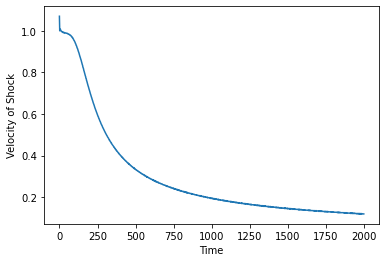

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import os
import sys


datadir = "./ST6/"
gamma0 = 400.
i_=0
#Maybe sort the files
path = '~/SGRB/SGRB/DataPlots'
files = os.listdir('./ST6/')
dbl = '.dbl'
DataFiles= [file for file in files if dbl in file]
number = np.linspace(0,1000,1001)
OrderedFiles = [0]*1001
BIGR = []
i_BIGR = 0
positionGraph = []
time = list(range(0,2000,2))
print(time)

for Data in DataFiles: 
    filenumber = Data[5] + Data[6] + Data[7] + Data[8]
    OrderedFiles[int(filenumber)] = Data
#Make Array with the right size





# This box loads a data file, creates appropriate x locaion and Lorentz factor arrays, 
# and find the location of the shock front.
# It then make plots of some of the data.


#dir = "~/data/science/PLUTO/Results/RHD/Shock_Tubes/ST5/"

# Set the directory to load data from
#datadir = "../../PLUTO/Results/RHD/ST6/"

for data in OrderedFiles:
    
# Load data from the given file.
    ##data = np.fromfile(datadir+"data.0999.dbl")
    data = np.fromfile(datadir + data)
# Assumes we are loading 3 columns of data
    datasize = np.int(data.size/3)
    #print (data)

    #print('Number of grid points = ',datasize)

    data = data.reshape((3,np.int(datasize)))
    #print(data)
# Set the range of radius we use in the simulation, and make an array of values in x.
# This is the coordinate of the middle of each cell.
    x = (np.arange(datasize)+.5)/(datasize)*640+.1

#print(x-.1,x.shape)
#print(data.shape)

    #print("data read")


# This is the inital Lotenz factor and velocity of material before it is shocked.


    #print("gamma0 = ",gamma0,", v0 = ",np.sqrt(1.-1./gamma0**2.))


# The 3 columns of data read are density, velocity, and pressure.
    dens = data[0,:]
    velx = data[1,:]
    pres = data[2,:]

# Calculate Lorentz factor (gamma) based on the velocity.
    gamma2 = 1./(1.-velx**2.)
    gamma = np.sqrt(gamma2)


# Find the location of the shock.
# In the non-relavitistic limit, the density at the shock should be 7 times the density in front of it, for an adiabatic index of 4/3.
# So we can make the shock location the first point where the density i greater than 4?
# This will be the location of the shock, to the nearest gird point

    bigr_index = np.max(np.argwhere(dens > 4.))  #1.01
    bigr = x[bigr_index]
    #print('shock radius = ',bigr)
    BIGR.append(bigr)
#bigr_all = np.zeros(DateFiles.size) 
#bigr
    #stri = str(i)
    xmin=0.1 
    xmax=640.1 

for position in BIGR: 
    if i_BIGR+1 < len(BIGR):
        distance = BIGR[i_BIGR+1] - BIGR[i_BIGR]
        speed = distance/2
        positionGraph.append(speed)
    i_BIGR+=1
    
plt.plot(time, positionGraph)
plt.ylabel("Velocity of Shock")
plt.xlabel("Time")
